<a href="https://colab.research.google.com/github/boykeu/dataset/blob/master/codex_hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problems Statement

### Perusahaan X yang bergerak di produk digital, sedang berfokus pada pengelolaan talent nya. Manager HR merekrut Anda selaku Data Scientist untuk membantu dalam melihat kondisi talent perusahaan X berdasarkan data.



---


#### Fakta yang ada:

##### a. Untuk mengurangi cost dalam rekrutmen, Perusahaan X berupaya mempertahankan talent eksisting.

##### b. Sudah dilakukan pengukuran performansi, employee satisfaction dan employee engagement namun belum ada tindak lanjut dari hasil pengukuran. 



---



## Tugas Anda:

##### 1. Berikan insight ke Management terkait kondisi talent di perusahaan X dengan visualisasi profil talent (dalam bentuk ppt/ Tableau/ Power BI/ Google Data Studio atau platform visualisasi lainnya)

##### 2. Buatlah dalam bentuk Power Point dengan rincian minimal terdapat rumusan masalah, metodologi, analisis, rekomendasi dan link git model dari masalah:

##### Bagaimana memprediksi talent yang berpotensi akan terminate (resign, performansi rendah dan lainnya)?



#### Diperbolehkan menambahkan asumsi dan data lainnya di luar dataset untuk mempertajam analisis (jika dibutuhkan).


###### Dataset dapat diunduh melalui http://bit.ly/datasethrcodex

# Import Dataset

In [1]:
# Import Our principal libraries

import numpy as np
import pandas as pd

In [4]:
from google.colab import files
file_upload = files.upload()

Saving dataset HR analytics.csv to dataset HR analytics.csv


# Read and Transform dataset

In [38]:
import datetime as dt
from io import StringIO

df = pd.read_csv('dataset HR analytics.csv')

now = pd.Timestamp('now')

df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB'] = df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y')) 
df['years_emp_age'] = (now - df['DOB']).astype('<m8[Y]') 

df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofHire'] = df['DateofHire'].where(df['DateofHire'] < now, df['DateofHire'] -  np.timedelta64(100, 'Y')) 
df['years_of_service'] = (now - df['DateofHire']).astype('<m8[Y]') 

# Create target field 'isAttrition'
df = df.assign(isAttrition=np.where(df['DateofTermination'].isnull(), False, True))

# Create Group Age so its easier to classify
bins1= [0,25,30,35,40,45,50,100]
labels = ['<25','25-30','31-35','36-40','41-45','46-50','>51']
df['AgeGroup'] = pd.cut(df['years_emp_age'], bins=bins1, labels=labels, right=False)

# Create Group Year of Service so its easier to classify
bins2= [0,5,10,15,35]
labels = ['<5','5-10','10-15','>16']
df['YearsofServiceGroup'] = pd.cut(df['years_of_service'], bins=bins2, labels=labels, right=False)

# Create Group Total Absence so its easier to classify
bins3= [0,2,5,10,30]
labels = ['<2','3-5','6-10','>10']
df['AbsencesGroup'] = pd.cut(df['Absences'], bins=bins3, labels=labels, right=False)

df['EngagementSurvey'] = df['EngagementSurvey'].round(decimals=0)

# Remove unused columns
df.drop(['Employee_Name', 'EmpID', 'DateofTermination', 'EmploymentStatus', 'LastPerformanceReview_Date', 'DOB', 'DateofHire', 'TermReason', 'years_of_service', 'years_emp_age', 'Absences'], axis='columns', inplace=True)

'''
'Employee_Name'
'EmpID'
'DateofTermination'
'EmploymentStatus'
'LastPerformanceReview_Date'
'DOB'---> transformed into years_emp_age
'DateofHire' ---> transformed into years_of_service
'TermReason' --> didnt show if the employee had beed terminated
'''
df.head(10)

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,RaceDesc,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,isAttrition,AgeGroup,YearsofServiceGroup,AbsencesGroup
0,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,Evaluate,Sunda,LinkedIn,5.0,5,0,0,False,36-40,5-10,<2
1,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,Pay,Sunda,Indeed,5.0,3,6,0,True,46-50,5-10,>10
2,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,HunianAja,Jawa,LinkedIn,3.0,3,0,0,True,31-35,5-10,3-5
3,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,Intermoda,Cina,Indeed,5.0,5,0,0,False,31-35,10-15,>10
4,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,Squad Pijar Sekolah,Bali,Google Search,5.0,4,0,0,True,31-35,5-10,3-5
5,Married,Married,F,TKP/ Outsource,Product Owner,Senior,Exceed,COM,ChatAja,Bali,LinkedIn,5.0,5,0,0,False,41-45,5-10,>10
6,Married,Married,F,TKP/ Outsource,Business Analyst,Junior,Average,COM,Vutura,Padang,LinkedIn,3.0,3,4,0,False,41-45,5-10,>10
7,Married,Divorced,M,TKP/ Outsource,Business Analyst,Junior,Exceed,ENT,Intermoda,Jawa,Employee Referral,5.0,4,0,0,False,36-40,5-10,>10
8,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,EWD,Sales Cycle,Sunda,Diversity Job Fair,4.0,3,0,0,False,>51,10-15,3-5
9,Married,Widowed,M,TKP/ Outsource,Product Owner,Middle,Need improvement,EWD,Activate & Install,Cina,Indeed,5.0,5,6,0,False,31-35,5-10,>10


In [39]:
# check for any null / missing value
df.isnull().values.any()

False

In [40]:
# check data dimension
df.shape

(287, 19)

In [41]:
df.describe()

,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30
count,287.000000,287.000000,287.000000,287.000000
mean,4.076655,3.895470,1.181185,0.411150
std,0.865649,0.910053,2.290585,1.273018
min,1.000000,1.000000,0.000000,0.000000
25%,4.000000,3.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,0.000000
75%,5.000000,5.000000,0.000000,0.000000
max,5.000000,5.000000,8.000000,6.000000


In [42]:
# print all of the data types and their unique value counts

for column in df.columns:
  print(str(column) + ' : ' + str(df[column].unique()))
  print(df[column].value_counts())
  print('___________________________________________________________________________')

MarriedID : ['Not married' 'Married']
Married        152
Not married    135
Name: MarriedID, dtype: int64
___________________________________________________________________________
MaritalStatusID : ['Single' 'Divorced' 'Married' 'Widowed']
Single      135
Married      55
Widowed      50
Divorced     47
Name: MaritalStatusID, dtype: int64
___________________________________________________________________________
GenderID : ['M' 'F']
F    163
M    124
Name: GenderID, dtype: int64
___________________________________________________________________________
EmpStatusID : ['TKP/ Outsource' 'Prohire' 'Karyawan Organik']
TKP/ Outsource      217
Prohire              66
Karyawan Organik      4
Name: EmpStatusID, dtype: int64
___________________________________________________________________________
RoleID : ['Product Owner' 'Business Analyst' 'UI Designer' 'UX Designer'
 'UX Writer' 'Artificial Intelligent' 'Back End Developer'
 'Front End Developer' 'Mobile Developer Android' 'System Docume

In [43]:
# Transform the data (Non-numerical ---> Numerical)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_transform = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df_transform

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,Squad,RaceDesc,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,isAttrition,AgeGroup,YearsofServiceGroup,AbsencesGroup
0,1,2,1,2,8,2,1,4,11,4,5,4,4,0,0,0,2,1,2
1,1,2,1,2,8,2,2,4,35,4,4,4,2,6,0,1,4,1,3
2,0,0,0,2,8,2,0,3,17,2,5,2,2,0,0,1,1,1,0
3,1,2,0,2,2,1,1,3,24,1,4,4,4,0,0,0,1,0,3
4,1,2,0,1,2,1,0,2,54,0,3,4,3,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,2,1,2,1,1,2,2,52,3,4,3,2,0,0,0,5,3,1
283,0,3,0,2,1,0,0,9,26,0,5,1,4,0,4,0,2,1,3
284,1,2,1,2,5,0,1,2,53,1,0,4,2,5,0,1,1,1,3
285,0,1,1,2,1,0,1,2,53,0,1,4,2,4,0,1,2,1,1


# Feature extraction and Engineering

In [44]:
# Print Between Column Correlation    
print(df_transform.corr())

                      MarriedID  ...  AbsencesGroup
MarriedID              1.000000  ...      -0.021902
MaritalStatusID        0.342306  ...      -0.131281
GenderID               0.108124  ...       0.005458
EmpStatusID           -0.032676  ...       0.097657
RoleID                -0.032959  ...       0.054889
LevelID                0.045130  ...       0.034571
PerfScoreID            0.028791  ...      -0.099518
Tribe                  0.073576  ...       0.041784
Squad                  0.112249  ...       0.009623
RaceDesc               0.074509  ...      -0.025642
RecruitmentSource     -0.027887  ...      -0.027810
EngagementSurvey       0.021421  ...       0.053027
EmpSatisfaction       -0.052933  ...       0.073849
SpecialProjectsCount  -0.019722  ...      -0.054791
DaysLateLast30         0.112584  ...      -0.041292
isAttrition           -0.026038  ...       0.082421
AgeGroup               0.023909  ...       0.042177
YearsofServiceGroup   -0.001737  ...      -0.072325
AbsencesGrou

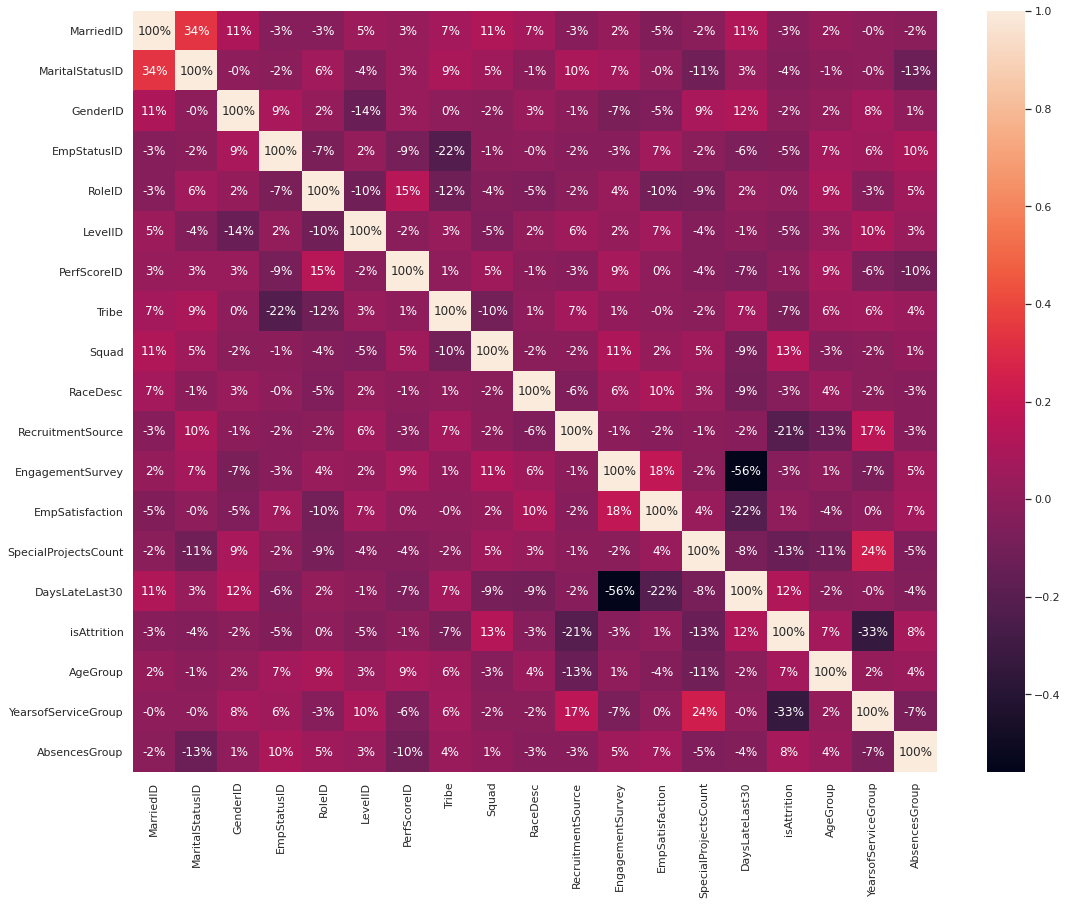

In [45]:
import seaborn as sns

# Visualize correlation
sns.set(rc={'figure.figsize':(18,14)})
sns.heatmap(df_transform.corr(), annot=True, fmt='.0%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


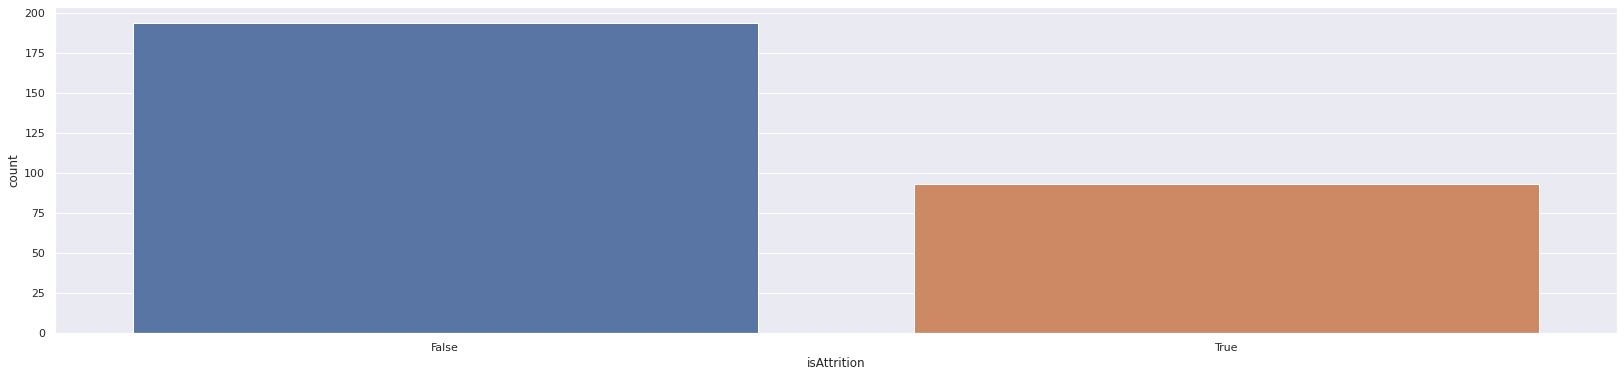

In [46]:
# Plot how many employee churned

sns.set(rc={'figure.figsize':(28, 6)})

sns.countplot(df['isAttrition'])

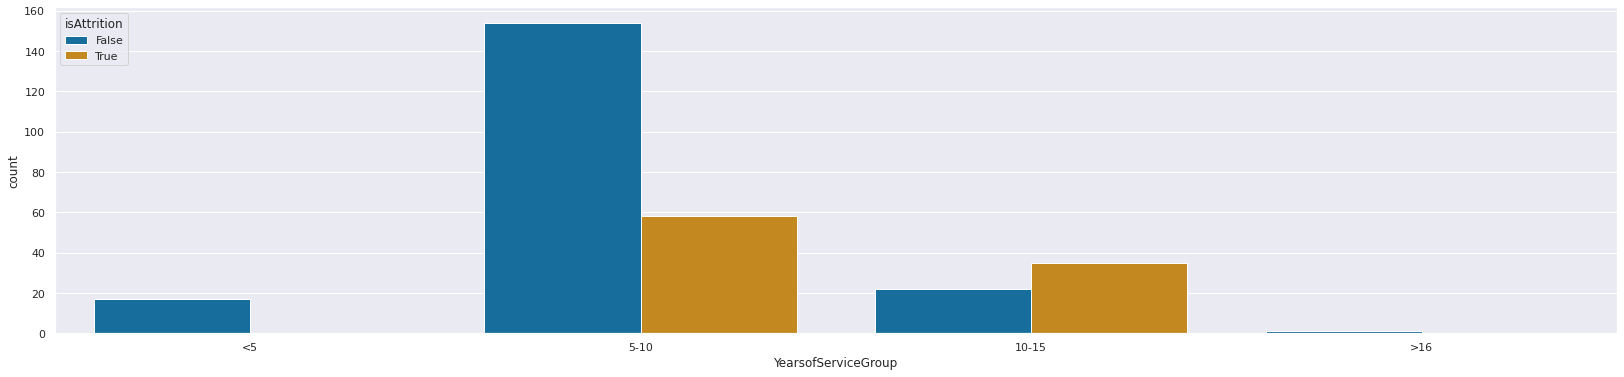

In [48]:
# Count no of employees that left and stayed by squad
sns.countplot(x = 'YearsofServiceGroup', hue = 'isAttrition', data = df, palette = 'colorblind')

In [49]:
# Split label data

X = df_transform.loc[ : , df_transform.columns != 'isAttrition'].values
Y = df_transform['isAttrition'].values

# Split into training n test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

In [50]:
X

array([[1, 2, 1, ..., 2, 1, 2],
       [1, 2, 1, ..., 4, 1, 3],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 2, 1, ..., 1, 1, 3],
       [0, 1, 1, ..., 2, 1, 1],
       [1, 2, 0, ..., 2, 0, 1]])

In [51]:
Y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1])

# Model build and deployment

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)

# Deploy train data and get score
forest.fit(X_train, Y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
# Deploy train data and get score
tree.fit(X_train, Y_train)

from xgboost import XGBClassifier
boost = XGBClassifier()
# Deploy train data and get score
boost.fit(X_train, Y_train)

# Print Score
print(f'RandomForestClassifier Model Testing Score = {forest.score(X_train, Y_train)}')
print(f'DecisionTreeClassifier Model Testing Score = {tree.score(X_train, Y_train)}')
print(f'XGBClassifier Model Testing Score = {boost.score(X_train, Y_train)}')

RandomForestClassifier Model Testing Score = 1.0
DecisionTreeClassifier Model Testing Score = 1.0
XGBClassifier Model Testing Score = 0.9348837209302325


In [54]:
from sklearn.metrics import confusion_matrix

# show RandomForestClassifier confusion matrix
cm_forest = confusion_matrix(Y_test, forest.predict(X_test))

TN_forest = cm_forest[0][0]
TP_forest = cm_forest[1][1]
FN_forest = cm_forest[1][0]
FP_forest = cm_forest[0][1]

# show DecisionTreeClassifier confusion matrix
cm_tree = confusion_matrix(Y_test, tree.predict(X_test))

TN_tree = cm_tree[0][0]
TP_tree = cm_tree[1][1]
FN_tree = cm_tree[1][0]
FP_tree = cm_tree[0][1]

# show XGBClassifier confusion matrix
cm_boost = confusion_matrix(Y_test, boost.predict(X_test))

TN_boost = cm_boost[0][0]
TP_boost = cm_boost[1][1]
FN_boost = cm_boost[1][0]
FP_boost = cm_boost[0][1]

print('cm_forest : ', cm_forest)
print(f'RandomForestClassifier Model testing aaccuracy = {(TP_forest+TN_forest) / (TP_forest+TN_forest+FN_forest+FP_forest)}')
print('cm_forest : ', cm_tree)
print(f'DecisionTreeClassifier Model testing aaccuracy = {(TP_tree+TN_tree) / (TP_tree+TN_tree+FN_tree+FP_tree)}')
print('cm_forest : ', cm_boost)
print(f'DecisionTreeClassifier Model testing aaccuracy = {(TP_boost+TN_boost) / (TP_boost+TN_boost+FN_boost+FP_boost)}')


cm_forest :  [[45  7]
 [15  5]]
RandomForestClassifier Model testing aaccuracy = 0.6944444444444444
cm_forest :  [[34 18]
 [13  7]]
DecisionTreeClassifier Model testing aaccuracy = 0.5694444444444444
cm_forest :  [[41 11]
 [13  7]]
DecisionTreeClassifier Model testing aaccuracy = 0.6666666666666666


In [59]:
FeatureName = df_transform.loc[ : , df_transform.columns != 'isAttrition'].columns
len(FeatureName)

18

Forest Feature Importance: MarriedID Score: 0.02572206603955537
Forest Feature Importance: MaritalStatusID Score: 0.042260302064873606
Forest Feature Importance: GenderID Score: 0.025218612668406748
Forest Feature Importance: EmpStatusID Score: 0.024851661770881384
Forest Feature Importance: RoleID Score: 0.06482906436742195
Forest Feature Importance: LevelID Score: 0.034945072097933044
Forest Feature Importance: PerfScoreID Score: 0.05792737115323022
Forest Feature Importance: Tribe Score: 0.07927004376459218
Forest Feature Importance: Squad Score: 0.12652588466020848
Forest Feature Importance: RaceDesc Score: 0.06091420027962054
Forest Feature Importance: RecruitmentSource Score: 0.10618937903586426
Forest Feature Importance: EngagementSurvey Score: 0.04427318119754831
Forest Feature Importance: EmpSatisfaction Score: 0.04549385713323583
Forest Feature Importance: SpecialProjectsCount Score: 0.04904846728735511
Forest Feature Importance: DaysLateLast30 Score: 0.022275361328123244
For

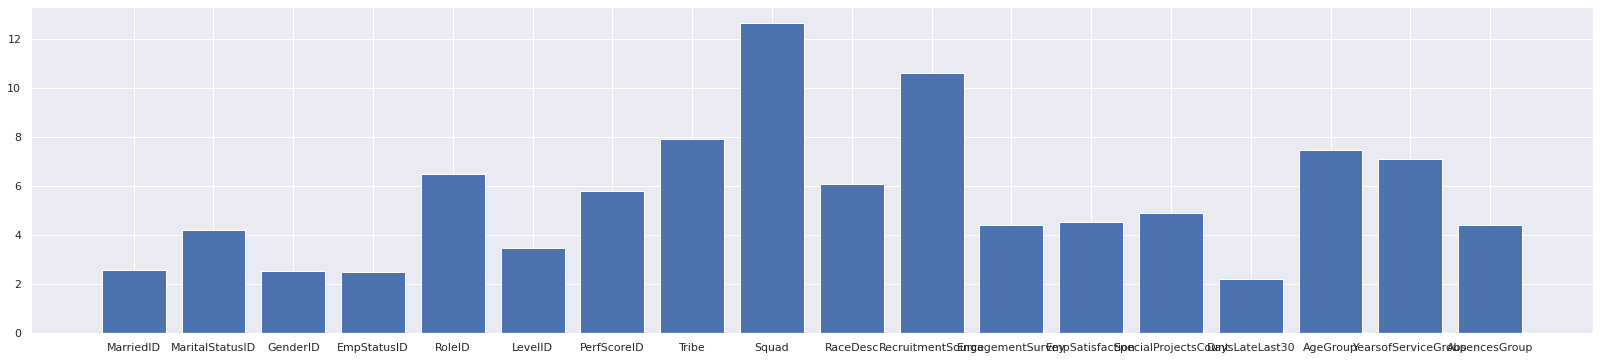

In [65]:
importance_forest = forest.feature_importances_
# summarize feature importance
for i,v in zip(FeatureName, importance_forest):
	print(f'Forest Feature Importance: {i} Score: {v}' )

from matplotlib import pyplot

# plot feature importance
pyplot.bar(FeatureName, importance_forest*100)
pyplot.show()

Tree Feature Importance: MarriedID Score: 0.0
Tree Feature Importance: MaritalStatusID Score: 0.009078639894022692
Tree Feature Importance: GenderID Score: 0.0
Tree Feature Importance: EmpStatusID Score: 0.03802495337320728
Tree Feature Importance: RoleID Score: 0.0744090030852422
Tree Feature Importance: LevelID Score: 0.08273434054327052
Tree Feature Importance: PerfScoreID Score: 0.14127603468595176
Tree Feature Importance: Tribe Score: 0.004609085257358458
Tree Feature Importance: Squad Score: 0.1881016155012989
Tree Feature Importance: RaceDesc Score: 0.09001134476245416
Tree Feature Importance: RecruitmentSource Score: 0.10186020209107226
Tree Feature Importance: EngagementSurvey Score: 0.007072482472829688
Tree Feature Importance: EmpSatisfaction Score: 0.0020740883658113035
Tree Feature Importance: SpecialProjectsCount Score: 0.061598864999659095
Tree Feature Importance: DaysLateLast30 Score: 0.02466241374063663
Tree Feature Importance: AgeGroup Score: 0.05524351206595983
Tree 

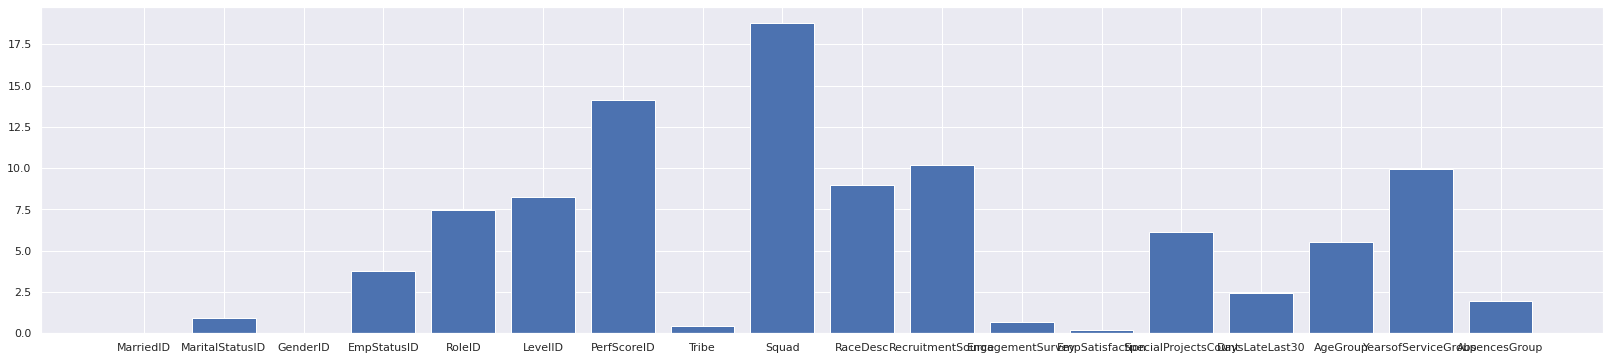

In [66]:
importance_tree = tree.feature_importances_
# summarize feature importance
for i,v in zip(FeatureName, importance_tree):
	print(f'Tree Feature Importance: {i} Score: {v}' )

# plot feature importance
pyplot.bar(FeatureName, importance_tree*100)
pyplot.show()

boost Feature Importance: MarriedID Score: 0.04263162985444069
boost Feature Importance: MaritalStatusID Score: 0.04803207516670227
boost Feature Importance: GenderID Score: 0.03837500140070915
boost Feature Importance: EmpStatusID Score: 0.07024752348661423
boost Feature Importance: RoleID Score: 0.04281852766871452
boost Feature Importance: LevelID Score: 0.05405183508992195
boost Feature Importance: PerfScoreID Score: 0.04626030847430229
boost Feature Importance: Tribe Score: 0.0509345605969429
boost Feature Importance: Squad Score: 0.06017985939979553
boost Feature Importance: RaceDesc Score: 0.04568985477089882
boost Feature Importance: RecruitmentSource Score: 0.08831438422203064
boost Feature Importance: EngagementSurvey Score: 0.050867073237895966
boost Feature Importance: EmpSatisfaction Score: 0.0326693095266819
boost Feature Importance: SpecialProjectsCount Score: 0.06480135023593903
boost Feature Importance: DaysLateLast30 Score: 0.035247381776571274
boost Feature Importanc

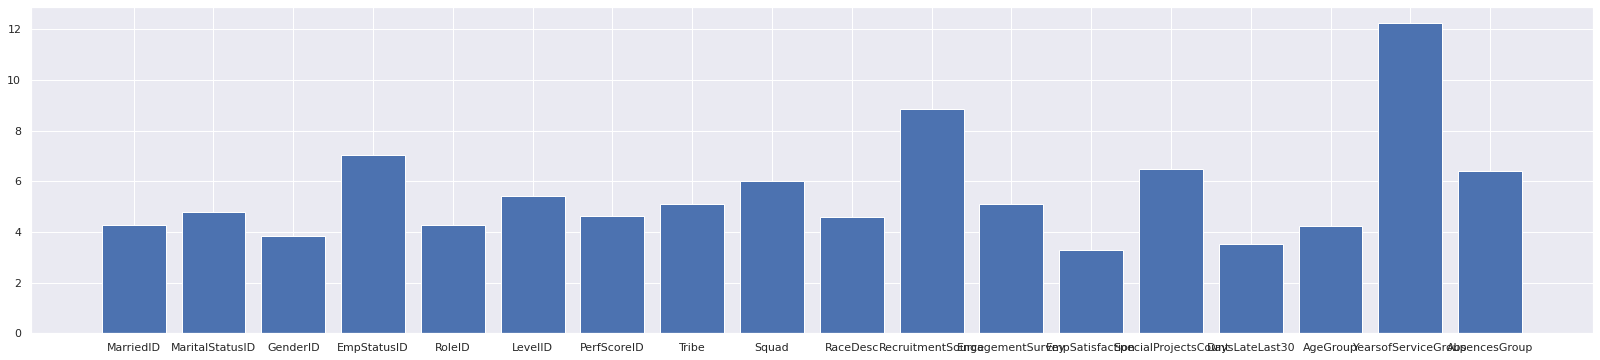

In [67]:
importance_boost = boost.feature_importances_
# summarize feature importance
for i,v in zip(FeatureName, importance_boost):
	print(f'boost Feature Importance: {i} Score: {v}' )

# plot feature importance
pyplot.bar(FeatureName, importance_boost*100)
pyplot.show()